## 2D - Discrete Cosine Transform image comression

In [1]:
from IPython.display import Image, display

In [2]:
#!pip install -r ../requirements.txt

### Help

In [3]:
!python ../src/2D-DCT.py -h

usage: 2D-DCT.py [-h] [-g] {encode,decode} ...

Exploiting spatial redundancy with the 2D Discrete Cosine Transform of
constant block size.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Encode an image
    decode         Decode an image

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [4]:
!python ../src/2D-DCT.py encode -h

usage: 2D-DCT.py encode [-h] [-B BLOCK_SIZE_DCT] [-t COLOR_TRANSFORM] [-p]
                        [-L LAMBDA]

options:
  -h, --help            show this help message and exit
  -B BLOCK_SIZE_DCT, --block_size_DCT BLOCK_SIZE_DCT
                        Block size (default: 8)
  -t COLOR_TRANSFORM, --color_transform COLOR_TRANSFORM
                        Color transform (default: "YCoCg")
  -p, --perceptual_quantization
                        Use perceptual quantization (default: "False")
  -L LAMBDA, --Lambda LAMBDA
                        Relative weight between the rate and the distortion.
                        If provided (float), the block size is RD-optimized
                        between {2**i; i=1,2,3,4,5,6,7}. For example, if
                        Lambda=1.0, then the rate and the distortion have the
                        same weight.


### Encoding and decoding

In [5]:
!wget http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png -O /tmp/pajarillo.png

--2025-03-12 05:45:18--  http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... failed: Name or service not known.
wget: unable to resolve host address ‘www.hpca.ual.es’


In [6]:
!python ../src/2D-DCT.py encode -i /tmp/pajarillo.png
!python ../src/2D-DCT.py decode

main Namespace(debug=False, subparser_name='encode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7fa8c4589da0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) 2D-DCT: block_size = 8
(INFO) entropy_image_coding: Read 374512 bytes from /tmp/pajarillo.png with shape (768, 637, 3) and type=uint8
(INFO) 2D-DCT: Padding image from dimensions (768, 637, 3) to new dimensions: (768, 640, 3)
(INFO) 2D-DCT: subbband_y_size=96, subband_x_size=80
[[[ 2.20812500e+02 -4.31874939e+02  9.61874924e+01]
  [ 2.52249985e+02 -4.61375000e+02  8.24999924e+01]
  [-1.81562500e+01 -4.53312500e+02  1.12781242e+02]
  ...
  [-1.13092995e+00 -5.07158995e-01  7.41131186e-01]
  [-5.95837402e+00 -4.01031494e-01  7.67850876e-01]
  [-1.51614227e+02  1.42619858e+01 -1.25479126e+00]]

 [[ 2.68906250e+02 -3.733125

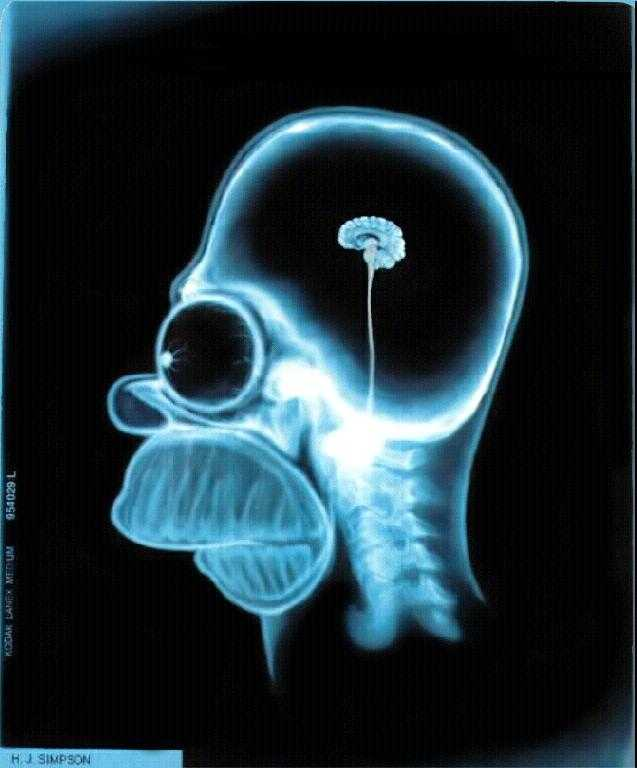

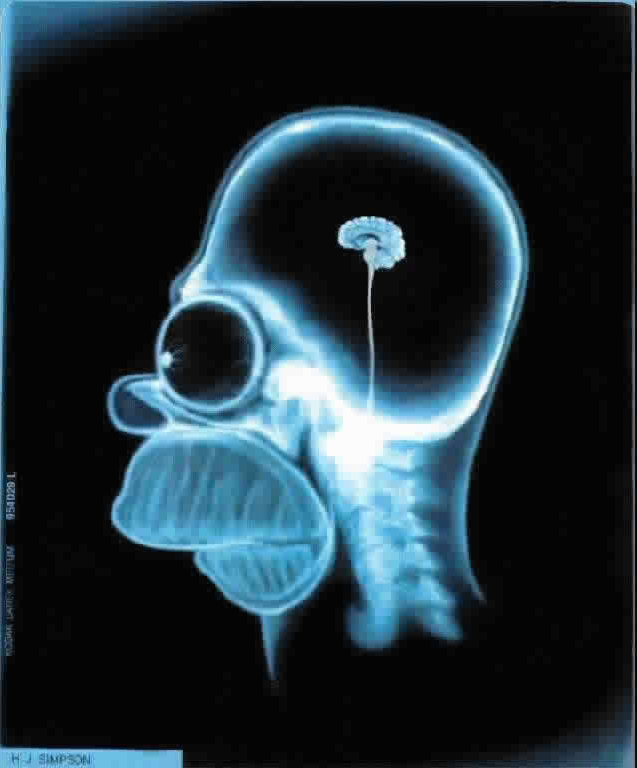

In [7]:
display(Image(filename="/tmp/pajarillo.png"))
display(Image(filename="/tmp/decoded.png"))

### Comparing with YCoCg + VC

In [ ]:
!python ../src/YCoCg.py encode -i /tmp/pajarillo.png -c VQ
!python ../src/YCoCg.py decode -c VQ
display(Image(filename="/tmp/decoded.png"))